In [2]:
# #Downloading the data
# import zipfile
# import urllib.request

# url = "https://files.grouplens.org/datasets/movielens/ml-100k.zip"
# urllib.request.urlretrieve(url, "ml-100k.zip")

# with zipfile.ZipFile("ml-100k.zip", "r") as zip_ref:
#     zip_ref.extractall("data/raw")


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from data_loader import MoviesLensLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from content_based import content_based

In [5]:
loader = MoviesLensLoader()
ratings, items = loader.load_all()
display(ratings.sample(5))
print("-"*50)
display(items.sample(5))

,user_id,item_id,rating,timestamp
30989,466,95,2,890285788
82908,330,64,5,876546409
80766,873,321,1,891392577
74849,738,517,3,892938492
97819,116,532,2,876452651


--------------------------------------------------


,item_id,title,release_date,video_release,imdb_url,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
540,541,Mortal Kombat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Mortal%20Komb...,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
433,434,Forbidden Planet (1956),01-Jan-1956,NaN,http://us.imdb.com/M/title-exact?Forbidden%20P...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
162,163,"Return of the Pink Panther, The (1974)",01-Jan-1974,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1656,1657,Target (1995),28-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Target%20(1995),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,772,Kids (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Kids%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f"The ratings counts is {ratings['rating'].value_counts().sort_index()}")
print(f"Number of unique users are: {ratings['user_id'].nunique()}")
print(f"Number of unique movies are : {ratings['item_id'].nunique()}")

The ratings counts is rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64
Number of unique users are: 943
Number of unique movies are : 1682


<Axes: xlabel='rating'>

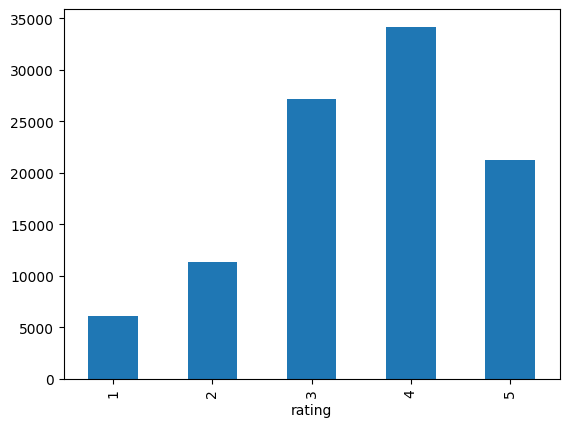

In [7]:
ratings.groupby("rating").size().plot(kind="bar")

In [8]:
items.isna().sum()
items['release_date'] = items['release_date'].ffill()
items = items.drop(columns = ['video_release'])
items = items.set_index('item_id')

In [9]:
# Plot Some Graphs here NA/ Total and other.
items

,title,release_date,imdb_url,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
item_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
tf= TfidfVectorizer()
tf_title = tf.fit_transform(items['title'].str.lower())
print(f"The formed TD-IDF matrix is:\n{tf_title.toarray()}")
print(f"\nThe dimension of  TD-IDF matrix is {tf_title.shape}")
tf_title_pd = pd.DataFrame(tf_title.toarray(), columns = tf.get_feature_names_out().tolist()).reset_index(drop = True)
combined_relv_feat = pd.concat([tf_title_pd, items[[f"genre_{i}" for i in range(19)]].reset_index(drop = True)], axis = 1)
#taking user input
user_input= input("Enter the movie name: ")
movie_index = items[items['title']==user_input].index[0]
# finding the similarity
titles = items['title']
cotent_recommdeation = content_based(movie_index, combined_relv_feat, titles)
display(cotent_recommdeation)

The formed TD-IDF matrix is:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The dimension of  TD-IDF matrix is (1682, 2429)
The Recommedations are:



0          Smoke (1995)
1           Kids (1995)
2        Panther (1995)
3      Cure, The (1995)
4    Restoration (1995)
Name: title, dtype: object

In [25]:
titles.iloc[[5, 1]].tolist()


['Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'GoldenEye (1995)']